In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
import joblib
from joblib import dump, load

print ( "numpy: {}".format(np.__version__) )
print ( "joblib: {}".format(joblib.__version__) )

import sklearn
import tensorflow as tf
from tensorflow import keras

print ( "sklearn: {}".format(sklearn.__version__) )
print ( "tensorflow: {}".format(tf.__version__) )

['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-f6d1a/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/srv/dask/lib', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/sit

2023-06-21 18:25:45.859291: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.3-6fa5c/x86_64-centos7-gcc11-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.3-c1d8e/x86_64-centos7-gcc11-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/jaxlib/mlir/_mlir_libs:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/onnxruntime/capi/:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_103swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/tensorflow/contrib

sklearn: 0.24.2
tensorflow: 2.8.0


In [2]:
# get_data, process_data, fiducial_cuts, fiducial_cuts_all, aperture_parametrisation, check_aperture
from processing import *
# efficiencies_2017
from proton_efficiency import *

#proton_selection = "SingleRP"
proton_selection = "MultiRP"

#data_periods = [ "2017B", "2017C1", "2017C2", "2017D", "2017E", "2017F1", "2017F2", "2017F3" ]
data_periods = [ "2017B", "2017C1", "2017E", "2017F1" ]

test_sample_ratio = 0.40

run_tables = False

run_random_experiments = False

use_keras = True
if use_keras:
    #prob_cut = 0.410305
    #prob_cut = 0.47243834
    #prob_cut = 0.59358937
    prob_cut = 0.50
else:
    prob_cut = 0.9693

Welcome to JupyROOT 6.22/06


In [3]:
# run_ranges_periods = {}
# run_ranges_periods[ "2017B" ]  = (297020,299329)
# run_ranges_periods[ "2017C1" ] = (299337,300785)
# run_ranges_periods[ "2017C2" ] = (300806,302029)
# run_ranges_periods[ "2017D" ]  = (302030,303434)
# run_ranges_periods[ "2017E" ]  = (303435,304826)
# run_ranges_periods[ "2017F1" ] = (304911,305114)
# run_ranges_periods[ "2017F2" ] = (305178,305902)
# run_ranges_periods[ "2017F3" ] = (305965,306462)
# print ( run_ranges_periods )
# run_=300000
# df_run_ranges = pd.DataFrame( run_ranges_periods, index=("min","max") ).transpose()
# df_run_ranges.index[ ( df_run_ranges["min"] <= run_ ) & ( df_run_ranges["max"] >= run_ ) ].tolist()

# f_data_period_ = lambda x: df_run_ranges.index[ ( df_run_ranges["min"] <= x ) & ( df_run_ranges["max"] >= x ) ].tolist()

# aperture_period_map = {
#     "2016_preTS2"  : "2016_preTS2",
#     "2016_postTS2" : "2016_postTS2",
#     "2017B"        : "2017_preTS2",
#     "2017C1"       : "2017_preTS2",
#     "2017C2"       : "2017_preTS2",
#     "2017D"        : "2017_preTS2",
#     "2017E"        : "2017_postTS2",
#     "2017F1"       : "2017_postTS2",
#     "2017F2"       : "2017_postTS2",
#     "2017F3"       : "2017_postTS2",
#     "2018"         : "2018"
# }

### Load classifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

scaler = None
clf = None
if use_keras:
#     scaler_path = "model/standard_scaler.joblib"
#     model_path = "model/keras_model.h5"
#     scaler_path = "model/standard_scaler_test-multiRP_2021_03_21-21_09_11.joblib"
#     model_path = "model/keras_model_test-multiRP_2021_03_21-23_42_07.h5"
    scaler_path = "model/standard_scaler_test-multiRP_2021_04_12-23_24_09.joblib"
    model_path = "model/keras_model_test-multiRP_2021_04_13-01_34_15.h5"
    scaler = load( scaler_path )
    clf = keras.models.load_model( model_path )
else:
    model_path = "model/ada_clf.joblib"
#     model_path = "model/adaboost_clf_test-Non3+3-Elatic+SingleDissociation-multiRP_2020_12_04-20_20_42.joblib"
    clf = load( model_path )
print( clf )

/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


2021-04-16 21:28:49.333604: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.1-e93ca/x86_64-centos7-gcc8-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.1-15d8b/x86_64-centos7-gcc8-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tensorflow/contrib/tensor_forest:/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/tensorflow/python/framework:/cvmfs/sft.cern.ch/lcg/releases/java/8u222-884d8/x86_64-centos7-gcc8-opt/jre/lib/amd64:/cvmfs/sft.cern.ch/lcg/views/LCG_99/x86_6

### Event selection and append classifier predictions

In [5]:
def select_events( df, clf=None, use_keras=False, scaler=None, prob_cut=-1. ):
    msk1_ = ( ( df["Arm"] == 0 ) & ( df.loc[ :, "Xi"] >= 0.050 ) )
    msk2_ = ( ( df["Arm"] == 1 ) & ( df.loc[ :, "Xi"] >= 0.060 ) )
    msk_ = ( msk1_ | msk2_ )
    df = df.loc[ msk_ ]

    if clf:
        variables_ = ['Xi', 'Muon0Pt', 'Muon1Pt', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMu']
        X_ = df[ variables_ ]
        y_proba = None
        y_pred = None
        if use_keras:
            X_scaled_ = scaler.transform( X_ )
            y_proba = np.array( clf.predict( X_scaled_ ) )
            y_pred = np.array( ( y_proba >= prob_cut ) if prob_cut > 0. else np.full_like( y_proba, -1 ) ).astype( "int32" )
        else:
            y_proba = np.array( clf.predict_proba( X_ )[:,1] )
            y_pred = np.array( ( y_proba >= prob_cut ) if prob_cut > 0. else clf.predict( X_ ) ).astype( "int32" )
        df[ "probability" ] = y_proba
        df[ "category" ] = y_pred
        
    return df

## Signal

In [6]:
# run_tables = True

labels_signals = ["Elastic", "SingleDissociation"]

fileNames_signals = {
    'Elastic': [ 'output-MC2017-Elastic-Non3+3-PreSel.h5' ],
    'SingleDissociation': [ 'output/output-MC2017-SingleDissociation-Non3+3-PreSel.h5' ]
    }

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_signals = {}
df_signals = {}

for label in labels_signals:
    if run_tables:
        with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

            df_counts_signal_, df_signal_ = get_data( fileNames_signals[ label ] )
            df_signal_ = process_data( df_signal_, proton_selection, min_mass = 110. )

            store_[ "counts" ] = df_counts_signal_
            store_[ "df" ] = df_signal_

    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
        df_counts_signals[ label ] = store_[ "counts" ]
        df_signals[ label ] = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/16 21:28:49
Total time elapsed: 0


In [7]:
df_counts_signals

{'Elastic': All        178402
 Muon       166756
 Vertex     149608
 Protons     91429
 dtype: int64, 'SingleDissociation': All        178174
 Muon       169697
 Vertex     158616
 Protons     56625
 dtype: int64}

### Set aside test sample

In [8]:
from sklearn.model_selection import train_test_split

for label in labels_signals:
    df_signal_ = df_signals[ label ]
    y_sig_ = np.ones( df_signal_.shape[0] )
    df_signal_train_, df_signal_test_, y_sig_train_, y_sig_test_ = train_test_split( df_signal_, y_sig_, test_size=test_sample_ratio, shuffle=True, random_state=12345 )
    print ( [ arr_.shape[0] for arr_ in ( df_signal_train_, df_signal_test_, y_sig_train_, y_sig_test_ ) ] )
    print ( df_signal_test_.mean() )
    df_signals[ label ] = df_signal_test_

[28830, 19221, 28830, 19221]
Run                       1.000000e+00
LumiSection               1.004417e+03
EventNum                  1.003923e+05
Slice                     0.000000e+00
CrossingAngle             1.335316e+02
MultiRP                   1.000000e+00
Arm                       4.798918e-01
RPId1                     5.098918e+01
RPId2                     7.098918e+01
TrackX1                   5.360522e+00
TrackY1                   8.681382e-01
TrackX2                   5.378507e+00
TrackY2                   9.039768e-01
TrackThX_SingleRP        -9.990000e+02
TrackThY_SingleRP        -9.990000e+02
Track1ThX_MultiRP        -6.571191e-06
Track1ThY_MultiRP         7.334872e-06
Track2ThX_MultiRP        -7.935825e-06
Track2ThY_MultiRP         6.452781e-06
TrackPixShift_SingleRP   -1.000000e+00
Track1PixShift_MultiRP    0.000000e+00
Track2PixShift_MultiRP    0.000000e+00
Xi                        5.838119e-02
T                        -1.802354e-01
ThX                       6.103922e

In [9]:
df_signals['Elastic']

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,xlow,xhigh,ylow,yhigh
99234,1,1372,137169,0,120.0,1,1,103,123,6.884521,...,783.843018,3,8.626284e-07,0.046896,0.077529,0.077529,2.422,24.620,-9.698,4.698
140279,1,1750,174907,0,150.0,1,1,103,123,2.978638,...,400.948456,12,5.804421e-04,0.022383,0.042499,0.042499,2.422,24.620,-9.698,4.698
190165,1,339,33868,0,130.0,1,1,103,123,3.995605,...,223.688828,3,2.251787e-04,0.005239,0.056514,0.056514,2.422,24.620,-9.698,4.698
148266,1,149,14874,0,120.0,1,0,3,23,5.656982,...,218.593445,0,7.299701e-05,0.049608,0.005699,0.049608,1.995,24.334,-10.098,4.298
44734,1,1117,111685,0,150.0,1,0,3,23,4.997070,...,111.511894,5,6.226767e-04,0.047299,0.001556,0.047299,1.995,24.334,-10.098,4.298
205320,1,632,63108,0,120.0,1,0,3,23,12.977051,...,236.842682,6,2.636554e-04,0.100070,0.003318,0.100070,1.995,24.334,-10.098,4.298
111452,1,1486,148530,0,140.0,1,0,3,23,5.606934,...,120.156525,1,1.043757e-03,0.052469,0.001628,0.052469,1.995,24.334,-10.098,4.298
84328,1,1232,123127,0,140.0,1,1,103,123,3.479370,...,151.280701,0,1.070642e-03,0.003250,0.041663,0.041663,2.422,24.620,-9.698,4.698
191766,1,354,35349,0,130.0,1,0,3,23,8.209473,...,116.916412,0,7.648572e-04,0.070977,0.001141,0.070977,1.995,24.334,-10.098,4.298
7014,1,763,76219,0,130.0,1,0,3,23,6.906982,...,155.143829,0,3.987060e-05,0.074484,0.001915,0.074484,1.995,24.334,-10.098,4.298


In [10]:
df_signals['Elastic'][ ['MultiRP', 'Arm', 'RPId1', 'RPId2',
                        'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                        'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
                        'Xi', 'T', 'ThX', 'ThY'] ]

,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,TrackX2,TrackY2,TrackThX_SingleRP,TrackThY_SingleRP,Track1ThX_MultiRP,Track1ThY_MultiRP,Track2ThX_MultiRP,Track2ThY_MultiRP,Xi,T,ThX,ThY
99234,1,1,103,123,6.884521,2.935547,6.883484,3.199951e+00,-999.0,-999.0,-3.469447e-16,-7.632783e-17,3.429201e-14,3.072273e-09,0.076666,-0.148733,0.000018,-5.786517e-05
140279,1,1,103,123,2.978638,1.076904,3.012085,1.250000e+00,-999.0,-999.0,-3.157197e-16,-6.591949e-17,-1.006573e-15,3.072273e-09,0.041093,-0.213824,0.000038,-6.179702e-05
190165,1,1,103,123,3.995605,1.041260,3.923004,1.099976e+00,-999.0,-999.0,-2.983724e-16,-6.245005e-17,4.196643e-14,3.072273e-09,0.055388,-0.020002,-0.000013,1.648485e-05
148266,1,0,3,23,5.656982,0.290558,5.710815,1.999969e-01,-999.0,-999.0,-6.245005e-17,-2.636780e-16,-8.552187e-15,-7.680683e-10,0.051295,-0.086672,-0.000005,4.553005e-05
44734,1,0,3,23,4.997070,-0.308197,5.103577,-4.500122e-01,-999.0,-999.0,-4.163336e-17,-2.636780e-16,5.917489e-14,1.152330e-09,0.048346,-0.214520,0.000036,6.337187e-05
205320,1,0,3,23,12.977051,0.515686,13.225952,4.500122e-01,-999.0,-999.0,-8.326673e-17,-2.220446e-16,-9.348078e-14,-7.680683e-10,0.098880,-0.071010,0.000036,1.763897e-05
111452,1,0,3,23,5.606934,0.223969,5.710815,1.499939e-01,-999.0,-999.0,-3.469447e-17,-2.775558e-16,-2.507994e-13,-7.680683e-10,0.052445,-0.075111,0.000028,3.216805e-05
84328,1,1,103,123,3.479370,1.325928,3.543457,1.500000e+00,-999.0,-999.0,-3.261280e-16,-5.898060e-17,-3.487488e-14,3.072273e-09,0.043292,-0.224138,0.000050,-5.440787e-05
191766,1,0,3,23,8.209473,0.976746,8.291748,9.500122e-01,-999.0,-999.0,-4.163336e-17,-2.914335e-16,-1.566022e-15,3.072273e-09,0.075327,-0.011532,0.000001,1.248303e-05
7014,1,0,3,23,6.906982,0.079292,6.849487,-7.735798e-08,-999.0,-999.0,-5.551115e-17,-2.636780e-16,8.681944e-14,-7.680683e-10,0.073473,-0.141457,-0.000054,2.434922e-05


In [11]:
df_signals['SingleDissociation']

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,InvMass,ExtraPfCands,Acopl,XiMuMuPlus,XiMuMuMinus,XiMuMu,xlow,xhigh,ylow,yhigh
63942,1,1034,103324,0,150.0,1,1,103,123,2.835815,...,141.787628,0,0.065965,0.003754,0.033429,0.033429,2.422,24.620,-9.698,4.698
108415,1,775,77438,0,150.0,1,1,103,123,3.061646,...,260.809387,0,0.000971,0.009602,0.041947,0.041947,2.422,24.620,-9.698,4.698
69695,1,1147,114675,0,140.0,1,0,3,23,5.974854,...,821.546509,2,0.035858,0.059216,0.067891,0.059216,1.995,24.334,-10.098,4.298
65463,1,1135,113464,0,140.0,1,1,103,123,3.045654,...,204.683609,0,0.001479,0.005054,0.049054,0.049054,2.422,24.620,-9.698,4.698
95617,1,1596,159570,0,120.0,1,1,103,123,3.995605,...,236.765106,1,0.000047,0.007343,0.045177,0.045177,2.422,24.620,-9.698,4.698
122053,1,1911,191077,0,110.0,1,0,3,23,4.223633,...,204.994888,1,0.015183,0.040122,0.006208,0.040122,1.995,24.334,-10.098,4.298
82885,1,1022,102160,0,130.0,1,1,103,123,3.679199,...,230.646103,0,0.089225,0.006228,0.051012,0.051012,2.422,24.620,-9.698,4.698
42780,1,1743,174201,0,120.0,1,0,3,23,8.666992,...,115.786293,1,0.008301,0.071396,0.001111,0.071396,1.995,24.334,-10.098,4.298
115941,1,1198,119731,0,130.0,1,0,3,23,5.182617,...,205.483017,2,0.019182,0.050317,0.004981,0.050317,1.995,24.334,-10.098,4.298
48679,1,103,10230,0,140.0,1,1,103,123,3.510742,...,510.098206,0,0.001240,0.030996,0.049682,0.049682,2.422,24.620,-9.698,4.698


In [12]:
df_signals['SingleDissociation'][ ['MultiRP', 'Arm', 'RPId1', 'RPId2',
                                   'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
                                   'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
                                   'Xi', 'T', 'ThX', 'ThY'] ]

,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,TrackX2,TrackY2,TrackThX_SingleRP,TrackThY_SingleRP,Track1ThX_MultiRP,Track1ThY_MultiRP,Track2ThX_MultiRP,Track2ThY_MultiRP,Xi,T,ThX,ThY
63942,1,1,103,123,2.835815,0.610352,3.012085,0.650024,-999.0,-999.0,-2.914335e-16,-6.938894e-17,2.175343e-14,-7.680683e-10,0.033744,-0.474284,1.074887e-04,0.000006
108415,1,1,103,123,3.061646,0.909973,3.087982,1.000000,-999.0,-999.0,-2.914335e-16,-6.245005e-17,1.447731e-13,-7.680683e-10,0.042473,-0.057499,3.467243e-05,-0.000013
69695,1,0,3,23,5.974854,0.781738,6.014465,0.799988,-999.0,-999.0,-5.551115e-17,-2.636780e-16,1.439959e-13,3.072273e-09,0.059463,-0.015940,-3.846602e-06,-0.000017
65463,1,1,103,123,3.045654,1.235107,2.936157,1.400024,-999.0,-999.0,-3.018419e-16,-5.551115e-17,5.431419e-15,-4.609319e-09,0.048409,-0.139880,-3.011430e-05,-0.000050
95617,1,1,103,123,3.995605,1.041260,3.998901,1.150024,-999.0,-999.0,-2.983724e-16,-6.245005e-17,-1.876971e-14,-7.680683e-10,0.046960,-0.025893,1.398855e-05,-0.000020
122053,1,0,3,23,4.223633,0.535583,4.192627,0.549988,-999.0,-999.0,-5.551115e-17,-2.775558e-16,4.694856e-14,3.072273e-09,0.039421,-0.086561,-4.425224e-05,-0.000012
82885,1,1,103,123,3.679199,1.175415,3.619354,1.300049,-999.0,-999.0,-3.191891e-16,-5.898060e-17,7.072121e-14,-7.680683e-10,0.050618,-0.030552,-8.876831e-06,-0.000025
42780,1,0,3,23,8.666992,0.475464,8.823120,0.399994,-999.0,-999.0,-1.387779e-17,-2.636780e-16,2.882243e-15,-7.680683e-10,0.071295,-0.073110,2.390789e-05,0.000034
115941,1,0,3,23,5.182617,0.700134,5.255371,0.700012,-999.0,-999.0,-4.163336e-17,-2.775558e-16,-1.543904e-14,-7.680683e-10,0.048514,-0.007996,1.186453e-05,-0.000002
48679,1,1,103,123,3.510742,0.467102,3.391632,0.450012,-999.0,-999.0,-3.122502e-16,-6.938894e-17,6.472600e-14,-7.680683e-10,0.055644,-0.136390,-3.019690e-05,0.000049


### Normalization of signal samples

In [13]:
L_B  = 2.360904801;
L_C1 = 5.313012839;
L_E  = 8.958810514;
L_F1 = 1.708478656;
lumi_periods = {}
lumi_periods[ "2017B" ]  = L_B
lumi_periods[ "2017C1" ] = L_C1
lumi_periods[ "2017E" ]  = L_E
lumi_periods[ "2017F1" ] = L_F1
print ( lumi_periods )
np.sum( list( lumi_periods.values() ) )

{'2017B': 2.360904801, '2017C1': 5.313012839, '2017E': 8.958810514, '2017F1': 1.708478656}


18.34120681

In [14]:
#lumi = 18.346268
lumi = np.sum( list( lumi_periods.values() ) )

norm_factors = {}
norm_factors['Elastic'] = np.array( [ ( lumi / ( 200000 * test_sample_ratio ) ), 0.017254036*1000, 0.89 ] )
norm_factors['SingleDissociation'] = np.array( [ ( lumi / ( 200000 * test_sample_ratio ) ), 0.025643100*1000, 0.76 ] )
for label in labels_signals:
    df_signals[ label ]["norm"] = np.product( norm_factors[ label ] )

<ipython-input-14-f04dba205081>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signals[ label ]["norm"] = np.product( norm_factors[ label ] )


### Proton efficiency

In [15]:
strips_multitrack_efficiency, strips_sensor_efficiency, multiRP_efficiency, file_eff_strips, file_eff_multiRP = efficiencies_2017()

{'2017B': {'45': <cppyy.gbl.TH1F object at 0xd7a7750>, '56': <cppyy.gbl.TH1F object at 0xdf138e0>}, '2017C1': {'45': <cppyy.gbl.TH1F object at 0xdf215f0>, '56': <cppyy.gbl.TH1F object at 0xdf18e70>}, '2017C2': {'45': <cppyy.gbl.TH1F object at 0xdf990c0>, '56': <cppyy.gbl.TH1F object at 0xdf14a50>}, '2017D': {'45': <cppyy.gbl.TH1F object at 0xdf8b860>, '56': <cppyy.gbl.TH1F object at 0xdfb79c0>}, '2017E': {'45': <cppyy.gbl.TH1F object at 0xdfa9450>, '56': <cppyy.gbl.TH1F object at 0xdfc2ed0>}, '2017F1': {'45': <cppyy.gbl.TH1F object at 0xe247810>, '56': <cppyy.gbl.TH1F object at 0xe243740>}, '2017F2': {'45': <cppyy.gbl.TH1F object at 0xe233690>, '56': <cppyy.gbl.TH1F object at 0xe2624f0>}, '2017F3': {'45': <cppyy.gbl.TH1F object at 0xe25ef00>, '56': <cppyy.gbl.TH1F object at 0xe255a00>}}
{'2017B': {'45': <cppyy.gbl.TH2F object at 0xde7ac90>, '56': <cppyy.gbl.TH2F object at 0xdf134b0>}, '2017C1': {'45': <cppyy.gbl.TH2F object at 0xdf17f60>, '56': <cppyy.gbl.TH2F object at 0xdf192d0>}, '2

In [16]:
# period_ = "2017E"
# f_multiRP_ = lambda row: multiRP_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].GetBinContent(
#                 multiRP_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].FindBin( row["TrackX1"], row["TrackY1"] )
#                 )
# df_signals['Elastic'].apply(
#     f_multiRP_,
#     axis=1
#     )

In [17]:
for period_ in data_periods:
    f_eff_all_ = None
    if proton_selection == "SingleRP":
        f_eff_multiRP_           = lambda row: multiRP_efficiency[ period_ ][ "45" if row["RPId1"] == 23 else "56" ].GetBinContent(
                                        multiRP_efficiency[ period_ ][ "45" if row["RPId1"] == 23 else "56" ].FindBin( row["TrackX1"], row["TrackY1"] )
                                        )

        f_eff_all_               = lambda row: f_eff_multiRP_(row)
        
    elif proton_selection == "MultiRP":
        f_eff_strips_multitrack_ = lambda row: strips_multitrack_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].GetBinContent( 1 )

        f_eff_strips_sensor_     = lambda row: strips_sensor_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].GetBinContent(
                                        strips_sensor_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].FindBin( row["TrackX2"], row["TrackY2"] )
                                        )

        f_eff_multiRP_           = lambda row: multiRP_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].GetBinContent(
                                        multiRP_efficiency[ period_ ][ "45" if row["Arm"] == 0 else "56" ].FindBin( row["TrackX1"], row["TrackY1"] )
                                        )

        f_eff_all_               = lambda row: f_eff_strips_multitrack_(row) * f_eff_strips_sensor_(row) * f_eff_multiRP_(row)
    
    #df_signals['Elastic'][ 'eff_strips_multitrack_' + period_ ] = df_signals['Elastic'].apply( f_eff_strips_multitrack_, axis=1 )
    #df_signals['Elastic'][ 'eff_strips_sensor_' + period_ ]     = df_signals['Elastic'].apply( f_eff_strips_sensor_, axis=1 )
    #df_signals['Elastic'][ 'eff_multiRP_' + period_ ]           = df_signals['Elastic'].apply( f_eff_multiRP_, axis=1 )
    
    df_signals['Elastic'][ 'eff_all_' + period_ ]               = df_signals['Elastic'].apply( f_eff_all_, axis=1 )
    df_signals['SingleDissociation'][ 'eff_all_' + period_ ]    = df_signals['SingleDissociation'].apply( f_eff_all_, axis=1 )

<ipython-input-17-7caeed7fa241>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signals['SingleDissociation'][ 'eff_all_' + period_ ]    = df_signals['SingleDissociation'].apply( f_eff_all_, axis=1 )


In [18]:
df_signals['Elastic'][ 'eff_all_weighted' ] = 0.
df_signals['SingleDissociation'][ 'eff_all_weighted' ] = 0.
for period_ in data_periods:
    df_signals['Elastic'][ 'eff_all_weighted' ] = df_signals['Elastic'][ 'eff_all_weighted' ] + lumi_periods[ period_ ] * df_signals['Elastic'][ 'eff_all_' + period_ ]
    df_signals['SingleDissociation'][ 'eff_all_weighted' ] = df_signals['SingleDissociation'][ 'eff_all_weighted' ] + lumi_periods[ period_ ] * df_signals['SingleDissociation'][ 'eff_all_' + period_ ]
df_signals['Elastic'][ 'eff_all_weighted' ] = df_signals['Elastic'][ 'eff_all_weighted' ] / lumi
df_signals['SingleDissociation'][ 'eff_all_weighted' ] = df_signals['SingleDissociation'][ 'eff_all_weighted' ] / lumi

<ipython-input-18-b6ed3222ba4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signals['SingleDissociation'][ 'eff_all_weighted' ] = 0.
<ipython-input-18-b6ed3222ba4e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signals['SingleDissociation'][ 'eff_all_weighted' ] = df_signals['SingleDissociation'][ 'eff_all_weighted' ] + lumi_periods[ period_ ] * df_signals['SingleDissociation'][ 'eff_all_' + period_ ]
<ipython-input-18-b6ed3222ba4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


### Random experiments

In [19]:
if run_random_experiments:
    from random_experiment import *
    
    np.random.seed( 42 )

    # per period, arm
    systematics = {}
    #systematics[ "Xi" ] = ( systematics_Xi_X, systematics_Xi_Y )
    #systematics[ "Xi" ] = get_systematics_vs_xi_ROOT( data_periods, fileName="reco_characteristics/reco_characteristics_version1.root" )
    systematics[ "Xi" ] = get_systematics_vs_xi_h5( data_periods, fileName="reco_characteristics/reco_characteristics_version1.h5" )
   
    print ( systematics )
    
    random_experiment( df_signals['Elastic'], data_periods=data_periods, lumi_weights=lumi_periods, variables=[ "Xi" ], variations=systematics )
    random_experiment( df_signals['SingleDissociation'], data_periods=data_periods, lumi_weights=lumi_periods, variables=[ "Xi" ], variations=systematics )
    df_signals['Elastic'].loc[ :, "Xi" ] = df_signals['Elastic'].loc[ :, "Xi_smeared"]
    df_signals['SingleDissociation'].loc[ :, "Xi" ] = df_signals['SingleDissociation'].loc[ :, "Xi_smeared"]

In [20]:
#df_signals['Elastic'][ ["Xi","sigma_Xi","Xi_smeared"] ]

In [21]:
#df_signals['SingleDissociation'][ ["Xi","sigma_Xi","Xi_smeared"] ]

In [22]:
# df_signals['Elastic'] = select_events( df_signals['Elastic'], clf=clf, use_keras=use_keras, scaler=scaler, prob_cut=prob_cut )
# df_signals['SingleDissociation'] = select_events( df_signals['SingleDissociation'], clf=clf, use_keras=use_keras, scaler=scaler, prob_cut=prob_cut )
for label in labels_signals:
    df_signals[ label ] = select_events( df_signals[ label ], clf=clf, use_keras=use_keras, scaler=scaler, prob_cut=prob_cut )

<ipython-input-5-b76230ed5b63>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "probability" ] = y_proba
<ipython-input-5-b76230ed5b63>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "category" ] = y_pred
<ipython-input-5-b76230ed5b63>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "probability" ] 

In [23]:
df_signals['Elastic']

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,ylow,yhigh,norm,eff_all_2017B,eff_all_2017C1,eff_all_2017E,eff_all_2017F1,eff_all_weighted,probability,category
99234,1,1372,137169,0,120.0,1,1,103,123,6.884521,...,-9.698,4.698,0.003521,0.460484,0.545252,0.404647,0.405147,0.452611,0.472847,0
148266,1,149,14874,0,120.0,1,0,3,23,5.656982,...,-10.098,4.298,0.003521,0.456461,0.550439,0.066869,0.437371,0.291609,0.771539,1
205320,1,632,63108,0,120.0,1,0,3,23,12.977051,...,-10.098,4.298,0.003521,0.494133,0.583288,0.066874,0.444310,0.306622,0.161987,0
111452,1,1486,148530,0,140.0,1,0,3,23,5.606934,...,-10.098,4.298,0.003521,0.456461,0.550439,0.066869,0.437371,0.291609,0.342547,0
191766,1,354,35349,0,130.0,1,0,3,23,8.209473,...,-10.098,4.298,0.003521,0.462658,0.556612,0.065782,0.436763,0.293607,0.138706,0
7014,1,763,76219,0,130.0,1,0,3,23,6.906982,...,-10.098,4.298,0.003521,0.457915,0.555117,0.068817,0.433705,0.293761,0.500368,1
193007,1,366,36534,0,120.0,1,1,103,123,10.654297,...,-9.698,4.698,0.003521,0.493171,0.572624,0.419366,0.419188,0.473245,0.263647,0
73452,1,74,7325,0,130.0,1,1,103,123,10.747070,...,-9.698,4.698,0.003521,0.480233,0.562726,0.415227,0.422710,0.467019,0.345885,0
154194,1,1818,181742,0,150.0,1,0,3,23,4.741211,...,-10.098,4.298,0.003521,0.480947,0.542281,0.099459,0.420526,0.306747,0.452794,0
193760,1,374,37329,0,150.0,1,0,3,23,9.395020,...,-10.098,4.298,0.003521,0.463478,0.563575,0.065042,0.439057,0.295581,0.019418,0


In [24]:
df_signals['SingleDissociation']

,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,ylow,yhigh,norm,eff_all_2017B,eff_all_2017C1,eff_all_2017E,eff_all_2017F1,eff_all_weighted,probability,category
69695,1,1147,114675,0,140.0,1,0,3,23,5.974854,...,-10.098,4.298,0.004468,0.463470,0.554231,0.066777,0.440171,0.293825,0.323194,0
42780,1,1743,174201,0,120.0,1,0,3,23,8.666992,...,-10.098,4.298,0.004468,0.459555,0.561356,0.066931,0.438601,0.295314,0.146127,0
122,1,2,189,0,150.0,1,0,3,23,7.787109,...,-10.098,4.298,0.004468,0.462961,0.549109,0.062607,0.430047,0.289296,0.764422,1
46925,1,442,44173,0,120.0,1,0,3,23,5.558105,...,-10.098,4.298,0.004468,0.462134,0.553511,0.067403,0.434956,0.293265,0.767476,1
110275,1,761,76090,0,140.0,1,1,103,123,6.406982,...,-9.698,4.698,0.004468,0.461211,0.540409,0.406161,0.400705,0.451628,0.555988,1
46958,1,443,44233,0,150.0,1,0,3,23,6.180420,...,-10.098,4.298,0.004468,0.465787,0.555704,0.059961,0.435041,0.290743,0.626648,1
101717,1,1806,180502,0,140.0,1,1,103,123,5.576904,...,-9.698,4.698,0.004468,0.465639,0.544934,0.403752,0.407264,0.452942,0.145234,0
52349,1,395,39453,0,150.0,1,0,3,23,6.291992,...,-10.098,4.298,0.004468,0.465561,0.558443,0.066580,0.432874,0.294539,0.709907,1
101292,1,1799,179815,0,140.0,1,0,3,23,6.878418,...,-10.098,4.298,0.004468,0.464320,0.557210,0.062773,0.434937,0.292354,0.293554,0
52539,1,398,39713,0,120.0,1,0,3,23,7.221924,...,-10.098,4.298,0.004468,0.468319,0.560153,0.067716,0.439784,0.296587,0.684406,1


## Background

In [25]:
resample_factor = 20
label = "data_random_resample_20"

fileNames_bkg = [
    'output/output-UL2017B-PreSel-Rnd-Res20.h5',
    'output/output-UL2017C1-PreSel-Rnd-Res20.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_0.h5',
    'output/output-UL2017E-PreSel-Rnd-Res20_1.h5',
    'output/output-UL2017F1-PreSel-Rnd-Res20.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_bkg, df_bkg = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_bkg_list_ = []
        df_bkg_list_ = []
        for file_ in fileNames_bkg:
            df_counts_bkg_, df_bkg_ = get_data( [ file_ ] )
            df_bkg_ = process_data( df_bkg_, proton_selection, min_mass = 110., within_aperture=True )
            df_counts_bkg_list_.append( df_counts_bkg_ )
            df_bkg_list_.append( df_bkg_ )

        df_counts_bkg_ = df_counts_bkg_list_[0]
        for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
            df_counts_bkg_ = df_counts_bkg_.add( df_counts_bkg_list_[idx_] )

        df_bkg_ = pd.concat( df_bkg_list_ )
        
        store_[ "counts" ] = df_counts_bkg_
        store_[ "df" ] = df_bkg_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_bkg = store_[ "counts" ]
    df_bkg = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/16 21:29:13
Total time elapsed: 1


In [26]:
df_counts_bkg

All           869119560
Muon            8456020
Vertex          7782360
ProtonsRnd      6301680
dtype: int64

### Set aside test sample

In [27]:
from sklearn.model_selection import train_test_split

y_bkg_ = np.zeros( df_bkg.shape[0] )
df_bkg_train_, df_bkg_test_, y_bkg_train_, y_bkg_test_ = train_test_split( df_bkg, y_bkg_, test_size=test_sample_ratio, shuffle=True, random_state=12345 )
print ( [ arr_.shape[0] for arr_ in ( df_bkg_train_, df_bkg_test_, y_bkg_train_, y_bkg_test_ ) ] )
# print ( df_bkg_test_.mean() )
df_bkg = df_bkg_test_

[727796, 485198, 727796, 485198]


In [28]:
norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) * ( 1. / test_sample_ratio ) ] )
df_bkg["norm"] = np.product( norm_factors['Bkg'] )

In [29]:
df_bkg = select_events( df_bkg, clf=clf, use_keras=use_keras, scaler=scaler, prob_cut=prob_cut )
df_bkg

<ipython-input-5-b76230ed5b63>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "probability" ] = y_proba
<ipython-input-5-b76230ed5b63>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "category" ] = y_pred


,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh,norm,probability,category
931377,303838,698,1020683264,3,130.0,1,1,103,123,7.717773,...,0.023206,2017E,True,2.422,24.620,-9.698,4.698,0.125,2.262890e-04,0
240398,303998,166,216886368,12,150.0,1,1,103,123,6.843018,...,0.026504,2017E,True,2.422,24.620,-9.698,4.698,0.125,1.923964e-09,0
830447,300280,440,559030272,10,150.0,1,1,103,123,4.314697,...,0.027692,2017C1,True,2.422,24.620,-9.698,4.698,0.125,2.372533e-03,0
393413,305112,126,126610400,6,150.0,1,0,3,23,6.260498,...,0.011132,2017F1,True,1.995,24.334,-10.098,4.298,0.125,1.925433e-06,0
806350,304797,1154,2007562880,15,120.0,1,1,103,123,9.954102,...,0.024156,2017E,True,2.422,24.620,-9.698,4.698,0.125,1.404151e-07,0
498669,299149,466,673804352,14,140.0,1,1,103,123,6.507812,...,0.001710,2017B,True,2.422,24.620,-9.698,4.698,0.125,1.287757e-06,0
765511,300235,124,188800800,5,150.0,1,0,3,23,9.574707,...,0.013089,2017C1,True,1.995,24.334,-10.098,4.298,0.125,1.118016e-10,0
176720,300155,812,1092535040,12,130.0,1,0,3,23,5.956055,...,0.009705,2017C1,True,1.995,24.334,-10.098,4.298,0.125,1.086116e-03,0
711934,304778,165,310412576,18,130.0,1,1,103,123,15.831055,...,0.002724,2017E,True,2.422,24.620,-9.698,4.698,0.125,7.460046e-11,0
136519,299062,210,346101376,13,140.0,1,1,103,123,6.284912,...,0.002003,2017B,True,2.422,24.620,-9.698,4.698,0.125,6.838162e-07,0


In [30]:
df_bkg[ ['MultiRP', 'Arm', 'RPId1', 'RPId2',
         'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
         'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
         'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP',
         'Xi', 'T', 'ThX', 'ThY'] ]

,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,TrackX2,TrackY2,TrackThX_SingleRP,TrackThY_SingleRP,Track1ThX_MultiRP,Track1ThY_MultiRP,Track2ThX_MultiRP,Track2ThY_MultiRP,Track1PixShift_MultiRP,Track2PixShift_MultiRP,Xi,T,ThX,ThY
931377,1,1,103,123,7.717773,3.917969,7.778809,4.246582,-999.0,-999.0,-0.000450,-0.004251,-0.011944,0.002010,0,0,0.083591,-0.304767,0.000052,-0.000070
240398,1,1,103,123,6.843018,0.598999,6.612549,0.624084,-999.0,-999.0,-0.000594,-0.003225,-0.010418,-0.000869,0,0,0.109480,-0.217202,-0.000043,0.000060
830447,1,1,103,123,4.314697,1.865356,4.228577,2.043213,-999.0,-999.0,0.004837,-0.000891,-0.010441,0.002130,0,0,0.063251,-0.057753,-0.000011,-0.000035
393413,1,0,3,23,6.260498,-1.885376,6.102234,-2.185303,-999.0,-999.0,0.001468,0.000730,0.004402,-0.000261,0,0,0.080536,-0.875371,-0.000082,0.000125
806350,1,1,103,123,9.954102,1.825684,9.824951,1.921265,-999.0,-999.0,-0.000153,-0.002640,-0.001113,0.002037,0,0,0.124452,-0.142661,-0.000006,0.000058
498669,1,1,103,123,6.507812,-1.518921,6.394470,-1.615479,-999.0,-999.0,0.003735,-0.002356,-0.010738,-0.001504,0,0,0.095222,-0.192892,-0.000002,0.000069
765511,1,0,3,23,9.574707,-0.990540,9.608887,-1.189331,-999.0,-999.0,0.006756,0.004091,-0.001191,0.001998,0,0,0.096490,-0.230496,-0.000013,0.000075
176720,1,0,3,23,5.956055,1.512451,5.947815,1.604370,-999.0,-999.0,0.006170,0.004532,0.004301,0.004154,0,0,0.060343,-0.127257,-0.000030,-0.000047
711934,1,1,103,123,15.831055,-7.824219,16.092773,-8.351562,-999.0,-999.0,0.000433,-0.003081,-0.007854,0.001757,0,0,0.130358,-2.678105,0.000125,0.000239
136519,1,1,103,123,6.284912,3.042480,6.296021,3.303467,-999.0,-999.0,0.004837,-0.000891,-0.009182,0.002534,0,0,0.076829,-0.158121,0.000035,-0.000052


In [31]:
# #df_bkg["period"] = df_bkg["Run"].map( f_bkg_period_ )
# df_bkg.loc[ :, "period" ] = np.nan
# for idx_ in range( df_run_ranges.shape[0] ):
#     msk_period_ = ( ( df_bkg[ "Run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_bkg[ "Run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#     sum_period_ = np.sum( msk_period_ )
#     if sum_period_ > 0:
#         period_key_ = df_run_ranges.index[ idx_ ]
#         df_bkg.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#         print ( "{}: {}".format( period_key_, sum_period_ ) )

In [32]:
# if proton_selection == "MultiRP":
#     #df_bkg[ "within_aperture" ] = df_bkg.apply( lambda row: check_aperture( aperture_period_map[ row["period"][0] ], row["Arm"], row["CrossingAngle"], row["Xi"], row["ThX"] ), axis=1 )
#     df_bkg[ "within_aperture" ] = df_bkg.apply( lambda row: check_aperture( aperture_period_map[ row["period"] ], row["Arm"], row["CrossingAngle"], row["Xi"], row["ThX"] ), axis=1 )

In [33]:
#df_bkg[ ["Xi", "ThX", "period", "within_aperture" ] ]

In [34]:
# df_bkg = df_bkg[ df_bkg[ "within_aperture" ] ]
# df_bkg

142507 233169


<ipython-input-35-1452943ecb6f>:13: RuntimeWarning: invalid value encountered in true_divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
<ipython-input-35-1452943ecb6f>:19: RuntimeWarning: invalid value encountered in true_divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


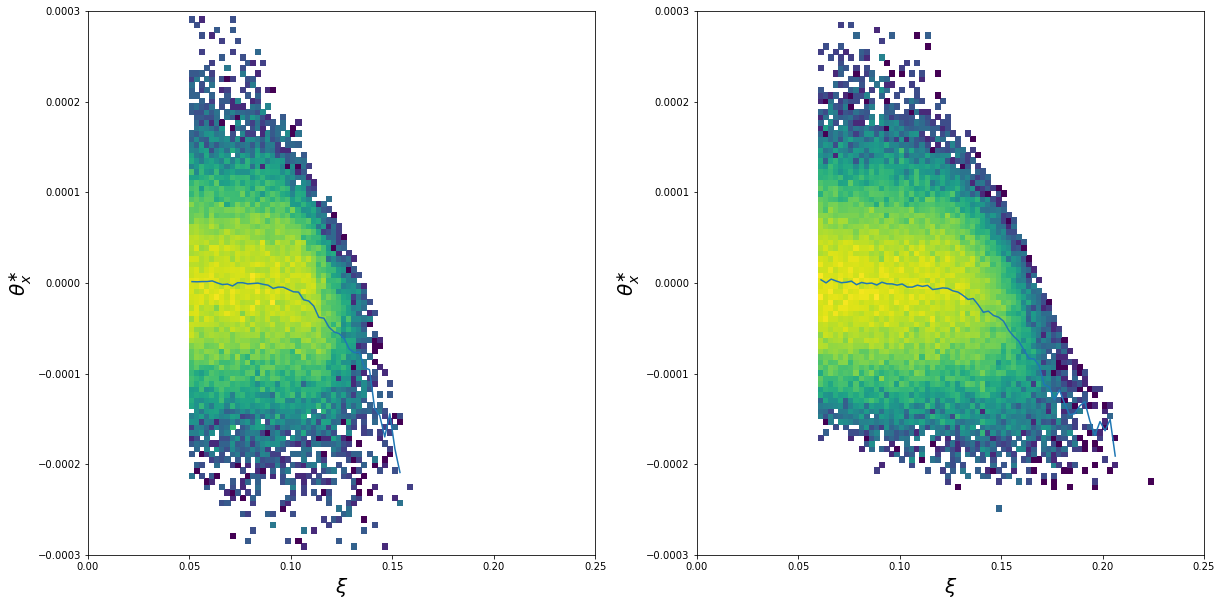

In [35]:
if proton_selection == "MultiRP":
    msk_bkg = ( df_bkg["InvMass"] >= 0. )
    # Multi-RP
    msk1_bkg = msk_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
    msk2_bkg = msk_bkg & ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )

    print ( len(df_bkg[ "Xi" ][ msk1_bkg ]), len(df_bkg[ "Xi" ][ msk2_bkg ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_bkg[ "Xi" ][ msk1_bkg ], df_bkg[ "ThX" ][ msk1_bkg ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_bkg[ "Xi" ][ msk2_bkg], df_bkg[ "ThX" ][ msk2_bkg ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

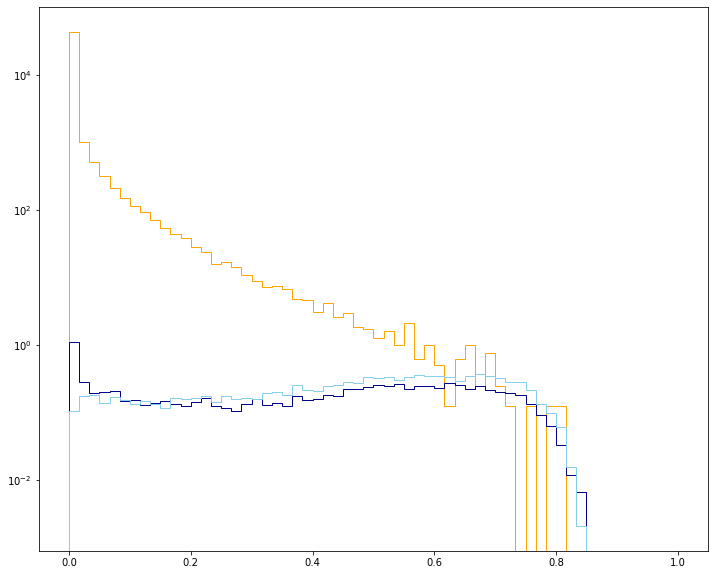

In [36]:
fig = plt.figure( figsize=(12,10) )
plt.hist( df_bkg["probability"], histtype='step', color='orange', bins=60, range=(0.,1.), weights=df_bkg["norm"] )
plt.hist( df_signals['SingleDissociation']["probability"], histtype='step', color='darkblue', bins=60, range=(0.,1.), weights=( df_signals['SingleDissociation']["norm"] * df_signals['SingleDissociation']["eff_all_weighted"] ) )
plt.hist( df_signals['Elastic']["probability"], histtype='step', color='skyblue', bins=60, range=(0.,1.), weights=( df_signals['Elastic']["norm"] * df_signals['Elastic']["eff_all_weighted"] ) )
plt.yscale('log')

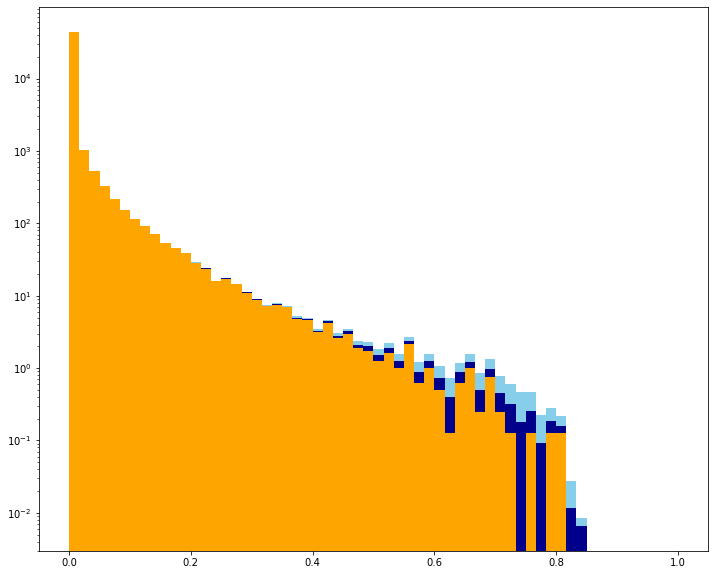

In [37]:
fig = plt.figure( figsize=(12,10) )
plt.hist(
    [ df_bkg["probability"], df_signals['SingleDissociation']["probability"], df_signals['Elastic']["probability"] ],
    color=[ 'orange', 'darkblue', 'skyblue' ],
    weights=[ df_bkg["norm"], ( df_signals['SingleDissociation']["norm"] * df_signals['SingleDissociation']["eff_all_weighted"] ), ( df_signals['Elastic']["norm"] * df_signals['Elastic']["eff_all_weighted"] ) ],
    stacked=True, bins=60, range=(0.,1.) )
plt.yscale('log')

## Data

In [38]:
label = "data"

fileNames_data = [
    'output/output-UL2017B-PreSel.h5',
    'output/output-UL2017C1-PreSel.h5',
    'output/output-UL2017E-PreSel_0.h5',
    'output/output-UL2017E-PreSel_1.h5',
    'output/output-UL2017F1-PreSel.h5'
]

import time
print( time.strftime("%Y/%m/%d %H:%M:%S", time.localtime() ) )
time_s_ = time.time()

df_counts_data, df_data = 2 * [None]

if run_tables:
    with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), complevel=5 ) as store_:

        df_counts_data_, df_data_ = get_data( fileNames_data )
        df_data_ = process_data( df_data_, proton_selection=proton_selection, min_mass = 110., within_aperture=True )
        
        store_[ "counts" ] = df_counts_data_
        store_[ "df" ] = df_data_

with pd.HDFStore( "reduced-data-store-{}.h5".format( label ), 'r' ) as store_:
    df_counts_data = store_[ "counts" ]
    df_data = store_[ "df" ]
        
time_e_ = time.time()
print ( "Total time elapsed: {:.0f}".format( time_e_ - time_s_ ) )

2021/04/16 21:29:32
Total time elapsed: 0


In [39]:
df_data = select_events( df_data, clf=clf, use_keras=use_keras, scaler=scaler, prob_cut=prob_cut )
df_data

<ipython-input-5-b76230ed5b63>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "probability" ] = y_proba
<ipython-input-5-b76230ed5b63>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[ "category" ] = y_pred


,Run,LumiSection,EventNum,Slice,CrossingAngle,MultiRP,Arm,RPId1,RPId2,TrackX1,...,XiMuMuMinus,XiMuMu,period,within_aperture,xlow,xhigh,ylow,yhigh,probability,category
3,297227,55,38079656,0,120.0,1,1,103,123,4.577393,...,0.048346,0.048346,2017B,True,2.422,24.620,-9.698,4.698,3.989309e-03,0
6,297227,56,38791640,0,120.0,1,1,103,123,8.585938,...,0.062855,0.062855,2017B,True,2.422,24.620,-9.698,4.698,8.040369e-04,0
61,297227,75,53449356,0,120.0,1,0,3,23,12.326172,...,0.007848,0.019344,2017B,True,1.995,24.334,-10.098,4.298,1.217404e-05,0
109,297227,94,68360752,0,120.0,1,0,3,23,5.153076,...,0.001269,0.090327,2017B,True,1.995,24.334,-10.098,4.298,5.889535e-04,0
110,297227,94,68360752,0,120.0,1,1,103,123,6.544922,...,0.001269,0.001269,2017B,True,2.422,24.620,-9.698,4.698,4.441398e-14,0
164,297227,105,76863168,0,120.0,1,0,3,23,5.155762,...,0.012475,0.008234,2017B,True,1.995,24.334,-10.098,4.298,2.798936e-06,0
176,297227,109,80472968,0,120.0,1,1,103,123,3.611084,...,0.046391,0.046391,2017B,True,2.422,24.620,-9.698,4.698,2.671930e-02,0
181,297227,110,81015088,0,120.0,1,1,103,123,6.093262,...,0.011531,0.011531,2017B,True,2.422,24.620,-9.698,4.698,3.570400e-09,0
215,297219,673,1247995264,0,130.0,1,0,3,23,13.382812,...,0.057475,0.001424,2017B,True,1.995,24.334,-10.098,4.298,2.526979e-06,0
236,297292,74,138836176,0,150.0,1,1,103,123,12.825684,...,0.010234,0.010234,2017B,True,2.422,24.620,-9.698,4.698,2.765195e-07,0


In [40]:
df_data[ ['MultiRP', 'Arm', 'RPId1', 'RPId2',
          'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
          'TrackThX_SingleRP', 'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP', 'Track2ThX_MultiRP', 'Track2ThY_MultiRP',
          'Track1PixShift_MultiRP', 'Track2PixShift_MultiRP',
          'Xi', 'T', 'ThX', 'ThY'] ]

,MultiRP,Arm,RPId1,RPId2,TrackX1,TrackY1,TrackX2,TrackY2,TrackThX_SingleRP,TrackThY_SingleRP,Track1ThX_MultiRP,Track1ThY_MultiRP,Track2ThX_MultiRP,Track2ThY_MultiRP,Track1PixShift_MultiRP,Track2PixShift_MultiRP,Xi,T,ThX,ThY
3,1,1,103,123,4.577393,1.367676,4.395691,1.493408,-999.0,-999.0,0.005131,-0.001112,-0.008007,0.001308,0,0,0.067306,-0.160121,-0.000061,-0.000014
6,1,1,103,123,8.585938,2.644531,8.483521,2.801025,-999.0,-999.0,0.004837,-0.000891,-0.011967,-0.000461,0,0,0.102869,-0.039719,-0.000015,0.000024
61,1,0,3,23,12.326172,-1.268066,12.443970,-1.466431,-999.0,-999.0,0.005287,0.003362,0.005198,0.003862,0,0,0.104492,-0.174950,-0.000013,0.000065
109,1,0,3,23,5.153076,1.484619,5.095215,1.582886,-999.0,-999.0,0.005730,0.003946,0.002597,0.002430,0,0,0.052344,-0.218203,-0.000056,-0.000047
110,1,1,103,123,6.544922,2.199219,6.017517,2.259277,-999.0,-999.0,0.004545,-0.000670,-0.012466,0.001675,0,0,0.137955,-1.224899,-0.000141,0.000115
164,1,0,3,23,5.155762,-0.244675,4.634277,-0.358795,-999.0,-999.0,0.005287,0.003362,0.006660,0.002110,0,0,0.098229,-2.145445,-0.000235,0.000032
176,1,1,103,123,3.611084,1.855103,3.331726,2.005127,-999.0,-999.0,0.004618,-0.001184,-0.011662,0.002524,0,0,0.063853,-0.457618,-0.000106,-0.000016
181,1,1,103,123,6.093262,3.723389,5.966736,4.026855,-999.0,-999.0,0.005280,-0.000305,-0.012127,0.001869,0,0,0.079756,-0.183463,-0.000032,-0.000059
215,1,0,3,23,13.382812,-1.072510,13.685547,-1.265137,-999.0,-999.0,0.005287,0.003362,0.002813,0.002414,0,0,0.101070,-0.337961,0.000065,0.000067
236,1,1,103,123,12.825684,-1.490356,13.019043,-1.613770,-999.0,-999.0,0.005424,-0.001332,-0.012966,0.000129,0,0,0.120749,-1.000013,0.000114,0.000117


In [41]:
# #df_data["period"] = df_data.apply( f_data_period_, axis=1 )
# #df_data["period"] = df_data["Run"].map( f_data_period_ )
# df_data.loc[ :, "period" ] = np.nan
# for idx_ in range( df_run_ranges.shape[0] ):
#     msk_period_ = ( ( df_data[ "Run" ] >= df_run_ranges.iloc[ idx_ ][ "min" ] ) & ( df_data[ "Run" ] <= df_run_ranges.iloc[ idx_ ][ "max" ] ) )
#     sum_period_ = np.sum( msk_period_ )
#     if sum_period_ > 0:
#         period_key_ = df_run_ranges.index[ idx_ ]
#         df_data.loc[ :, "period" ].loc[ msk_period_ ] = period_key_
#         print ( "{}: {}".format( period_key_, sum_period_ ) )

In [42]:
# if proton_selection == "MultiRP":
#     #df_data[ "within_aperture" ] = df_data.apply( lambda row: check_aperture( aperture_period_map[ row["period"][0] ], row["Arm"], row["CrossingAngle"], row["Xi"], row["ThX"] ), axis=1 )
#     df_data[ "within_aperture" ] = df_data.apply( lambda row: check_aperture( aperture_period_map[ row["period"][0] ], row["Arm"], row["CrossingAngle"], row["Xi"], row["ThX"] ), axis=1 )

In [43]:
#df_data[ ["Xi", "ThX", "period", "within_aperture" ] ]

In [44]:
# df_data = df_data[ df_data[ "within_aperture" ] ]
# df_data

18083 29611


<ipython-input-45-6338589ceee3>:13: RuntimeWarning: invalid value encountered in true_divide
  axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
<ipython-input-45-6338589ceee3>:19: RuntimeWarning: invalid value encountered in true_divide
  axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )


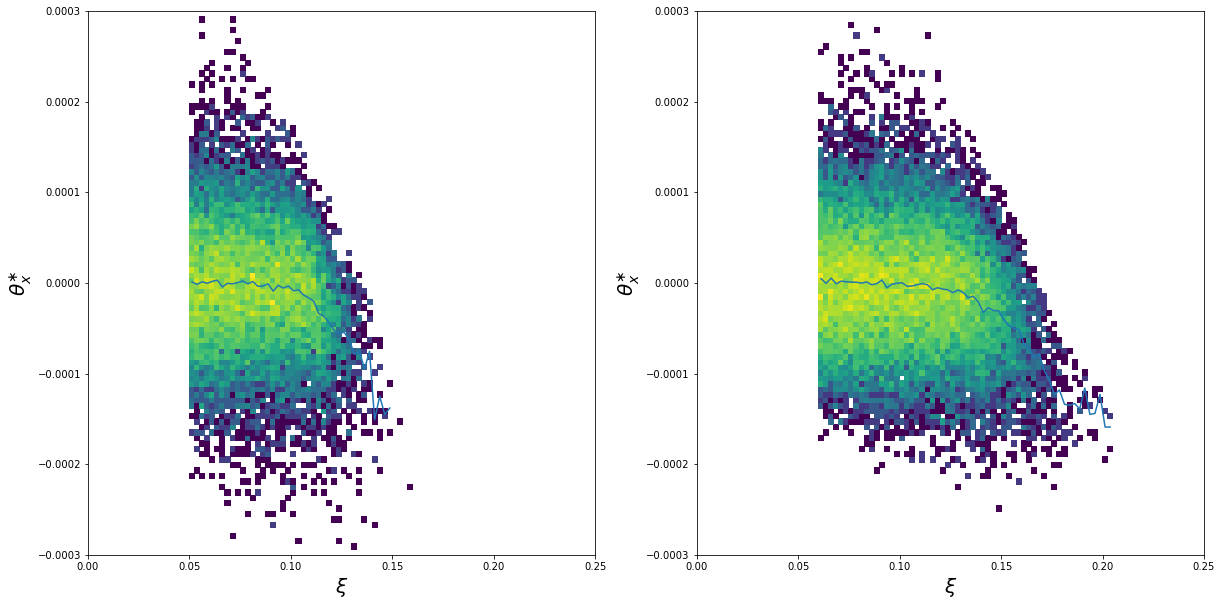

In [45]:
if proton_selection == "MultiRP":
    msk_data = ( df_data["InvMass"] >= 0. )
    # Multi-RP
    msk1_data = msk_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = msk_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

    print ( len(df_data[ "Xi" ][ msk1_data ]), len(df_data[ "Xi" ][ msk2_data ]) )

    fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
    h_, xedges_, yedges_, im_ = axes[0].hist2d( df_data[ "Xi" ][ msk1_data ], df_data[ "ThX" ][ msk1_data ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[0].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[0].set_xlabel( r"$\xi$", fontsize=20 )
    axes[0].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )
    h_, xedges_, yedges_, im_ = axes[1].hist2d( df_data[ "Xi" ][ msk2_data ], df_data[ "ThX" ][ msk2_data ], bins=(100,100), range=( (0.,0.25), (-300.e-06,300.e-06) ), norm=LogNorm(), cmap='viridis' )
    bin_centres_x_ = ( xedges_[:-1] + xedges_[1:] ) / 2
    bin_centres_y_ = ( yedges_[:-1] + yedges_[1:] ) / 2
    axes[1].plot( bin_centres_x_, np.mean( (h_ * bin_centres_y_), axis=1) / np.mean( h_, axis=1) )
    axes[1].set_xlabel( r"$\xi$", fontsize=20 )
    axes[1].set_ylabel( r"$\theta_x^{\ast}$", fontsize=20 )

### Plot data vs MC

In [46]:
for label in df_signals:
    df_signals[ label ][ "xi_ratio" ] = ( 1. - df_signals[ label ][ "Xi" ] / df_signals[ label ][ "XiMuMu" ] )
    
df_bkg[ "xi_ratio" ] = ( 1. - df_bkg[ "Xi" ] / df_bkg[ "XiMuMu" ] )
df_data[ "xi_ratio" ] = ( 1. - df_data[ "Xi" ] / df_data[ "XiMuMu" ] )

<ipython-input-46-8b8acde77724>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_signals[ label ][ "xi_ratio" ] = ( 1. - df_signals[ label ][ "Xi" ] / df_signals[ label ][ "XiMuMu" ] )
<ipython-input-46-8b8acde77724>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_bkg[ "xi_ratio" ] = ( 1. - df_bkg[ "Xi" ] / df_bkg[ "XiMuMu" ] )


In [47]:
def plot_data_mc( var, hist_bins, hist_range, df_data, df_mc_list, weights_mc_list, fig=None, ax=None ):
    if fig is None: fig = plt.figure( figsize=(12,10) )
    color=[ 'orange', 'darkblue', 'skyblue', 'lightblue' ]
    mc_data_var = [ df[ var ] for df in df_mc_list ]
    color = color[:len(mc_data_var)]
    
    ax_ = plt.gca() if ax is None else ax 
    ax_.hist(
        mc_data_var,
        color=color,
        weights=weights_mc_list,
        stacked=True, bins=hist_bins, range=hist_range )

    counts, bin_edges = np.histogram( df_data[ var ], bins=hist_bins, range=hist_range )
    errors = np.sqrt( counts )
    bin_centres = ( bin_edges[:-1] + bin_edges[1:] ) / 2.
    ax_.errorbar(bin_centres, counts, yerr=errors, fmt='o')
    
    return ( fig, ax_ )

In [48]:
msk1_data = None
msk2_data = None
if proton_selection == "SingleRP":
    # Single-RP in pixel stations
    msk1_data = ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 23 )
    msk2_data = ( df_data["MultiRP"] == 0) & ( df_data["RPId1"] == 123 )
elif proton_selection == "MultiRP":
    # Multi-RP
    msk1_data = ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
    msk2_data = ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

df_data_1 = df_data[ msk1_data ]
df_data_2 = df_data[ msk2_data ]

df_mc_list      = [ df_bkg, df_signals['SingleDissociation'], df_signals['Elastic'] ]
#weights_mc_list = [ df_bkg["norm"], df_signals['SingleDissociation']["norm"], df_signals['Elastic']["norm"] ]
weights_mc_list = [ df_bkg["norm"], ( df_signals['SingleDissociation']["norm"] * df_signals['SingleDissociation']["eff_all_weighted"] ), ( df_signals['Elastic']["norm"] * df_signals['Elastic']["eff_all_weighted"] ) ]

df_mc_list_1 = []
df_mc_list_2 = []
weights_mc_list_1 = []
weights_mc_list_2 = []
for idx_ in range( len( df_mc_list ) ):
    df_ = df_mc_list[idx_]
    
    msk1_ = None
    msk2_ = None
    if proton_selection == "SingleRP":
        # Single-RP in pixel stations
        msk1_ = ( df_["MultiRP"] == 0) & ( df_["RPId1"] == 23 )
        msk2_ = ( df_["MultiRP"] == 0) & ( df_["RPId1"] == 123 )
    elif proton_selection == "MultiRP":
        # Multi-RP
        msk1_ = ( df_["MultiRP"] == 1 ) & ( df_["Arm"] == 0 )
        msk2_ = ( df_["MultiRP"] == 1 ) & ( df_["Arm"] == 1 )
        
    df_mc_list_1.append( df_[ msk1_ ] )
    df_mc_list_2.append( df_[ msk2_ ] )
    weights_mc_list_1.append( weights_mc_list[idx_][ msk1_ ] )
    weights_mc_list_2.append( weights_mc_list[idx_][ msk2_ ] )
    

### Classification probability

y max. = 34396.8


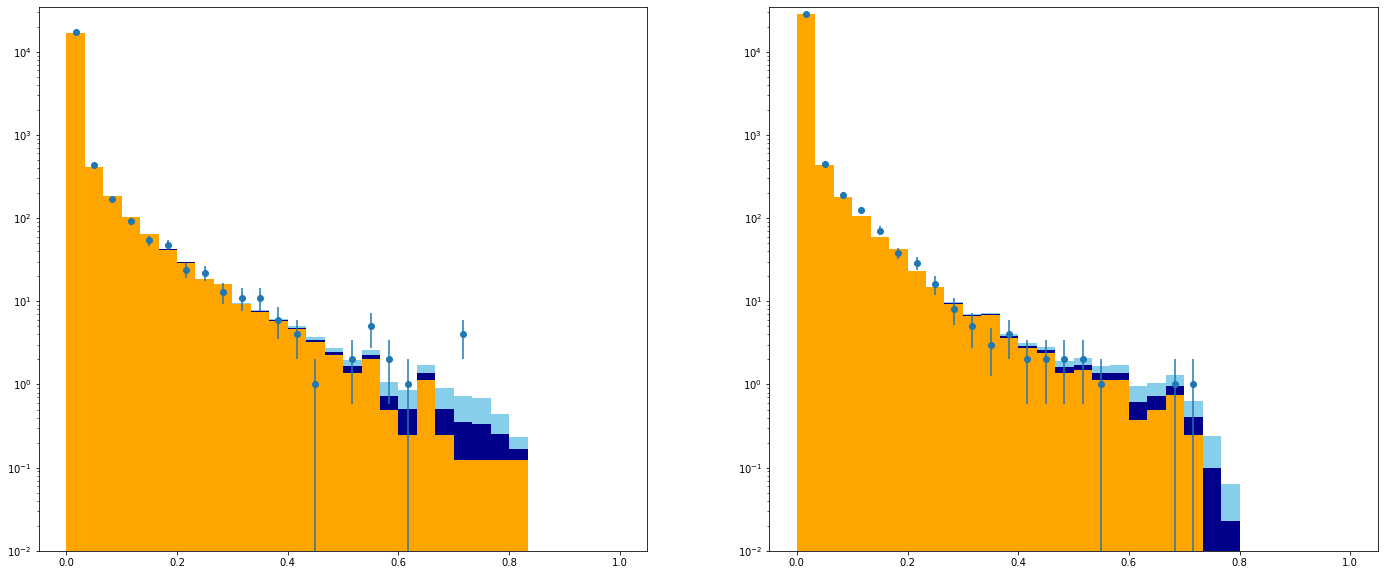

In [49]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

var_ = "probability"
hist_bins_ = 30
hist_range_ = (0.,1.)

counts_1, _ = np.histogram( df_data_1[ var_ ], bins=hist_bins_, range=hist_range_ )
counts_2, _ = np.histogram( df_data_2[ var_ ], bins=hist_bins_, range=hist_range_ )
errors_1 = np.sqrt( counts_1 )
errors_2 = np.sqrt( counts_2 )
idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_]
y_max += np.max( [ 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_], 0.20*y_max ] )
print ( "y max. = {}".format(y_max) )

fig_, ax_ = plot_data_mc( "probability", hist_bins=30, hist_range=(0.,1.),
                          df_data=df_data_1,
                          df_mc_list=df_mc_list_1,
                          weights_mc_list=weights_mc_list_1,
                          fig=fig, ax=axes[0]
                          )
fig_, ax_ = plot_data_mc( "probability", hist_bins=30, hist_range=(0.,1.),
                          df_data=df_data_2,
                          df_mc_list=df_mc_list_2,
                          weights_mc_list=weights_mc_list_2,
                          fig=fig, ax=axes[1]
                          )
axes[0].set_ylim( bottom=1e-02, top=y_max )
axes[1].set_ylim( bottom=1e-02, top=y_max )
axes[0].set_yscale('log')
axes[1].set_yscale('log')

y max. = 35162.4


(0.1, 50.0)

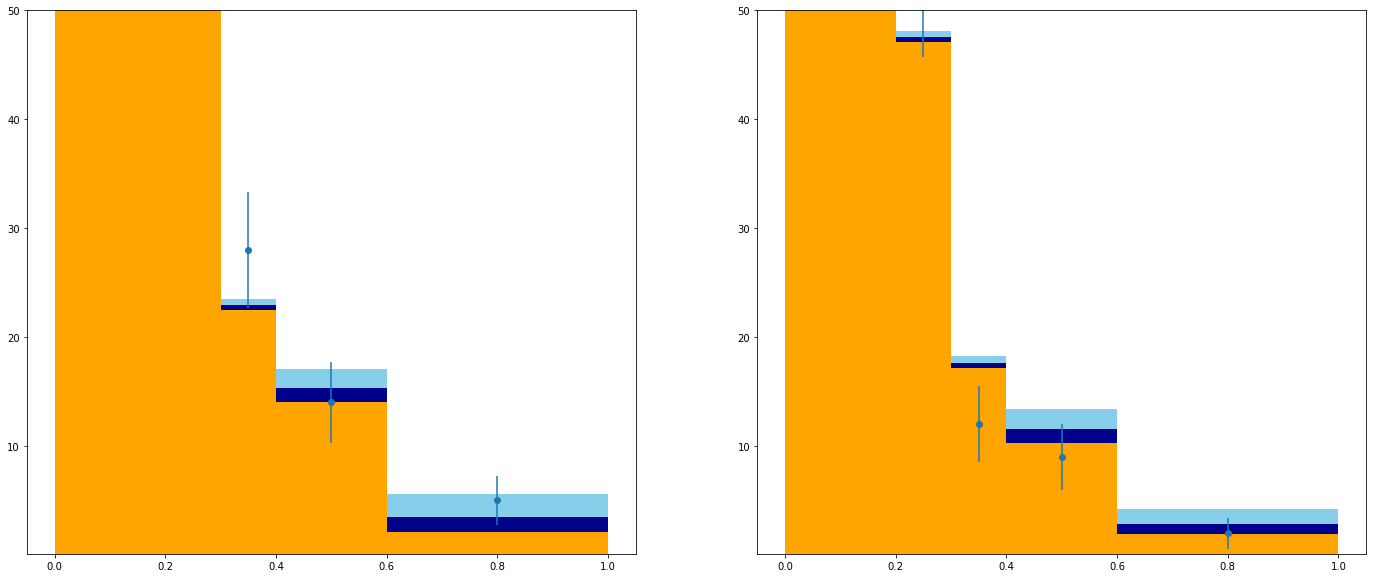

In [50]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

var_ = "probability"
#hist_bins_ = (0.,0.1,0.2,0.3,0.4,0.5,1.)
hist_bins_ = (0.,0.1,0.2,0.3,0.4,0.6,1.)

counts_1, _ = np.histogram( df_data_1[ var_ ], bins=hist_bins_, range=None )
counts_2, _ = np.histogram( df_data_2[ var_ ], bins=hist_bins_, range=None )
errors_1 = np.sqrt( counts_1 )
errors_2 = np.sqrt( counts_2 )
idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_]
y_max += np.max( [ 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_], 0.20*y_max ] )
print ( "y max. = {}".format(y_max) )

fig_, ax_ = plot_data_mc( var_, hist_bins=hist_bins_, hist_range=None,
                          df_data=df_data_1,
                          df_mc_list=df_mc_list_1,
                          weights_mc_list=weights_mc_list_1,
                          fig=fig, ax=axes[0]
                          )
fig_, ax_ = plot_data_mc( var_, hist_bins=hist_bins_, hist_range=None,
                          df_data=df_data_2,
                          df_mc_list=df_mc_list_2,
                          weights_mc_list=weights_mc_list_2,
                          fig=fig, ax=axes[1]
                          )
# axes[0].set_ylim( bottom=1e-01, top=y_max )
# axes[1].set_ylim( bottom=1e-01, top=y_max )
# axes[0].set_yscale('log')
# axes[1].set_yscale('log')
axes[0].set_ylim( bottom=1e-01, top=50. )
axes[1].set_ylim( bottom=1e-01, top=50. )

### Signal region

In [51]:
df_data_sel_1 = df_data_1[ df_data_1[ "probability" ] >= prob_cut ]
df_data_sel_2 = df_data_2[ df_data_2[ "probability" ] >= prob_cut ]

df_mc_list_sel_1 = []
df_mc_list_sel_2 = []
weights_mc_list_sel_1 = []
weights_mc_list_sel_2 = []
for idx_ in range( len( df_mc_list ) ):
    df_mc_list_sel_1.append( df_mc_list_1[idx_][ df_mc_list_1[idx_][ "probability" ] >= prob_cut ] )
    df_mc_list_sel_2.append( df_mc_list_2[idx_][ df_mc_list_2[idx_][ "probability" ] >= prob_cut ] )
    weights_mc_list_sel_1.append( weights_mc_list_1[idx_][ df_mc_list_1[idx_][ "probability" ] >= prob_cut ] )
    weights_mc_list_sel_2.append( weights_mc_list_2[idx_][ df_mc_list_2[idx_][ "probability" ] >= prob_cut ] )

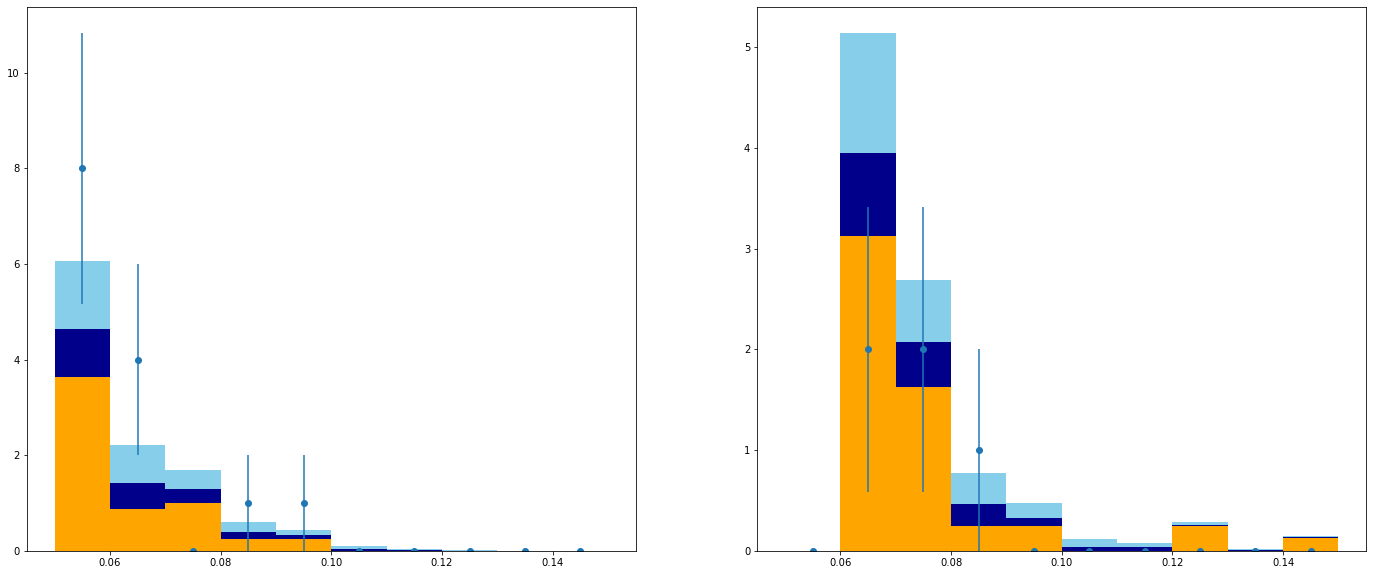

In [52]:
fig, axes = plt.subplots( 1, 2, figsize=(24,10) )

# var_ = "probability"
# hist_bins_ = 20
# hist_range_ = (0.,1.)

# var_ = "xi_ratio"
# hist_bins_ = 8
# hist_range_ = (-1.,1.)

var_ = "Xi"
hist_bins_ = 10
hist_range_ = (0.05,0.15)

# var_ = "ThX"
# hist_bins_ = 10
# hist_range_ = (-0.0005,0.0005)

# var_ = "ThY"
# hist_bins_ = 10
# hist_range_ = (-0.0005,0.0005)

fig_, ax_ = plot_data_mc( var_, hist_bins=hist_bins_, hist_range=hist_range_,
                          df_data=df_data_sel_1,
                          df_mc_list=df_mc_list_sel_1,
                          weights_mc_list=weights_mc_list_sel_1,
                          fig=fig, ax=axes[0]
                          )
fig_, ax_ = plot_data_mc( var_, hist_bins=hist_bins_, hist_range=hist_range_,
                          df_data=df_data_sel_2,
                          df_mc_list=df_mc_list_sel_2,
                          weights_mc_list=weights_mc_list_sel_2,
                          fig=fig, ax=axes[1]
                          )

### References